# Exploratory Data Analysis

Aim: Identify relevant features in the fake news dataset and update the dataset if needed. 

In [1]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
import seaborn as sns

In [29]:
# import standards for the plots
# Update rcParams
default_font_size = 14
plt.rcParams.update({
    "text.usetex": True,  # Enable LaTeX rendering
    "axes.grid": True,    # Enable grid
    "grid.alpha": 0.5,    # Set grid transparency
    "grid.linestyle": '--', # Set grid line style
    "axes.prop_cycle": plt.cycler(color=['#FFC300', '#001D3D']),  # Set default colors
    "font.family": "serif",  # Use serif font
    "font.serif": ["Computer Modern"], # Set LaTeX font
    "font.size": default_font_size,  # Set general font size
    "axes.labelsize": default_font_size,  # Set axis label size
    "xtick.labelsize": default_font_size,  # Set x-tick label size
    "ytick.labelsize": default_font_size,  # Set y-tick label size
    "legend.fontsize": default_font_size  # Set legend font size
})

In [2]:
df_fake = pd.read_csv('input\Fake.csv')
df_true = pd.read_csv('input\True.csv')

General checks about the dataframes:

In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

Let's check how many unique categories there are:

In [6]:
print('Unique Subjects in df_true:', df_true['subject'].unique())
print('Unique Subjects in df_fake:', df_fake['subject'].unique())

Unique Subjects in df_true: ['politicsNews' 'worldnews']
Unique Subjects in df_fake: ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [34]:
# For consistency for the later classification, change the names of the subjects to be the same across the two dataframes
df_true['subject'].replace('politicsNews', 'politics')
df_true['subject'].replace('worldnews', 'News')
print()

In [35]:
# In order to train the model, fake and real must be in the same dataset, and their label must be defined
df_fake['Real'] = 0 
df_true['Real'] = 1 

# check that the columns are the same before doing the concatenation
assert df_fake.columns.equals(df_fake.columns)

# concatenate the two dataframes
df_news = pd.concat([df_true, df_fake])

# check that the concatenation worked well 
assert df_news.shape[0] == (df_fake.shape[0] + df_true.shape[0])

In [31]:
# check for missing values
print(df_news.isnull().sum())

print()

# check for distribution of real and fake news
print(df_news['Real'].value_counts())

title      0
text       0
subject    0
date       0
Real       0
dtype: int64

Real
0    23481
1    21417
Name: count, dtype: int64


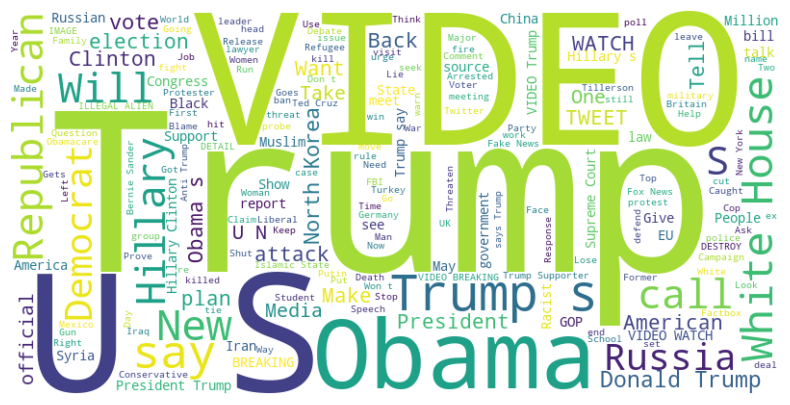

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all titles into a single text
text = ' '.join(df_news['title'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: ylabel='subject'>

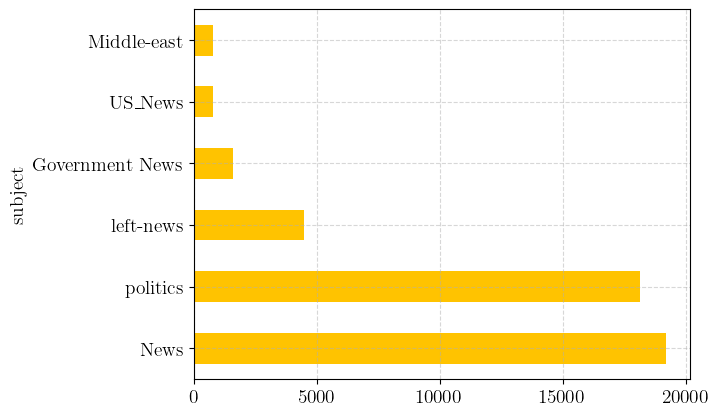

In [36]:
df_news['subject'].value_counts().plot(kind='barh')

In [38]:
# finally, save the dataframe for the classifier part 
df_news.to_csv('input/News.csv', index=False)